In [1]:
import pandas as pd
import pandas_datareader as pdr

In [4]:
key = '0495e074939c1b4fe46e891fe6149b60fe99e5fd'
df = pdr.get_data_tiingo('AAPL',api_key = key)

TypeError: concat() takes 1 positional argument but 2 were given

In [ ]:
df.tail()

close    high     low     open    volume  \
symbol date                                                                   
AAPL   2023-01-25 00:00:00+00:00  141.86  142.43  138.81  140.890  65799349   
       2023-01-26 00:00:00+00:00  143.96  144.25  141.90  143.170  54105068   
       2023-01-27 00:00:00+00:00  145.93  147.23  143.08  143.155  70555843   
       2023-01-30 00:00:00+00:00  143.00  145.55  142.85  144.955  64015274   
       2023-01-31 00:00:00+00:00  144.29  144.34  142.28  142.700  65874459   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
AAPL   2023-01-25 00:00:00+00:00    141.86   142.43  138.81  140.890   
       2023-01-26 00:00:00+00:00    143.96   144.25  141.90  143.170   
       2023-01-27 00:00:00+00:00    145.93   147.23  143.08  143.155   
       2023-01-30 00:00:00+00:00    143.00   145.55  142.85  144.955   
       2023-01-31 00:00:00+00:00    144.29   144.34  142.28  142.700   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2023-01-25 00:00:00+00:00   65799349      0.0          1.0  
       2023-01-26 00:00:00+00:00   54105068      0.0          1.0  
       2023-01-27 00:00:00+00:00   70555843      0.0          1.0  
       2023-01-30 00:00:00+00:00   64015274      0.0          1.0  
       2023-01-31 00:00:00+00:00   65874459      0.0          1.0

In [3]:
df.to_csv('AAPL.csv')

NameError: name 'df' is not defined

In [5]:
df = pd.read_csv('AAPL.csv')

In [6]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-01-25 00:00:00+00:00,141.86,142.43,138.81,140.890,65799349,141.86,142.43,138.81,140.890,65799349,0.0,1.0
1252,AAPL,2023-01-26 00:00:00+00:00,143.96,144.25,141.90,143.170,54105068,143.96,144.25,141.90,143.170,54105068,0.0,1.0
1253,AAPL,2023-01-27 00:00:00+00:00,145.93,147.23,143.08,143.155,70555843,145.93,147.23,143.08,143.155,70555843,0.0,1.0
1254,AAPL,2023-01-30 00:00:00+00:00,143.00,145.55,142.85,144.955,64015274,143.00,145.55,142.85,144.955,64015274,0.0,1.0
1255,AAPL,2023-01-31 00:00:00+00:00,144.29,144.34,142.28,142.700,65874459,144.29,144.34,142.28,142.700,65874459,0.0,1.0


In [7]:
df1 = df.reset_index()['close']

In [8]:
df1.head()

0    156.49
1    163.03
2    159.54
3    155.15
4    156.41
Name: close, dtype: float64

In [9]:
import matplotlib.pyplot as plt

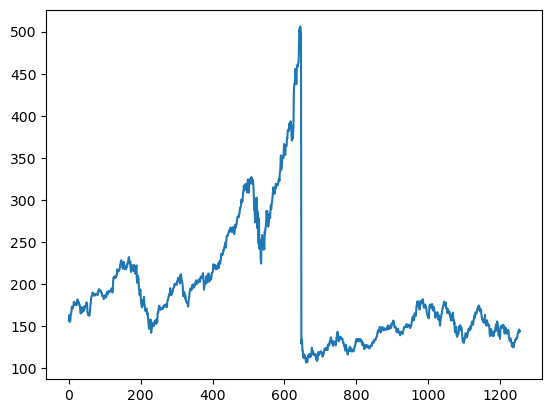

In [10]:
plt.plot(df1)

In [11]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.12435817],
       [0.14073889],
       [0.1319975 ],
       ...,
       [0.09790858],
       [0.09056982],
       [0.09380088]])

In [14]:
training_size  = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data =  df1[0:training_size,:]
test_data = df1[training_size:len(df1),:]

In [15]:
train_data.shape,test_data.shape

((816, 1), (440, 1))

In [16]:
def create_dataset(dataset,timeStep=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-timeStep-1):
        a = dataset[i:(i+timeStep),0]
        dataX.append(a)
        b = dataset[i+timeStep,0]
        dataY.append(b)
    return np.array(dataX),np.array(dataY)

In [17]:
X_train,y_train = create_dataset(train_data,100)
X_test,y_test = create_dataset(test_data,100)

In [18]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((715, 100), (715,), (339, 100), (339,))

In [19]:
X_train

array([[0.12435817, 0.14073889, 0.1319975 , ..., 0.18867877, 0.19433939,
        0.19366312],
       [0.14073889, 0.1319975 , 0.12100188, ..., 0.19433939, 0.19366312,
        0.19701941],
       [0.1319975 , 0.12100188, 0.1241578 , ..., 0.19366312, 0.19701941,
        0.19604258],
       ...,
       [0.04067627, 0.04032561, 0.03859737, ..., 0.06882905, 0.06983093,
        0.06900438],
       [0.04032561, 0.03859737, 0.04235441, ..., 0.06983093, 0.06900438,
        0.06697558],
       [0.03859737, 0.04235441, 0.04393237, ..., 0.06900438, 0.06697558,
        0.06672511]])

In [20]:
## reshape into be like [samples,timeStep,features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [21]:
X_train.shape,X_test.shape

((715, 100, 1), (339, 100, 1))

In [22]:
## create the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam

In [65]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer=Adam())

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=100,verbose=1)

Epoch 1/100


2023-02-02 00:46:01.152124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 00:46:01.462519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 00:46:01.509102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 00:46:01.558051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 00:46:01.648474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 00:46:01.908747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 00:46:01.998873: I tensorflow/core/grappler/optimizers/cust

23/23 [==============================] - 4s 127ms/step - loss: 0.0051 - val_loss: 3.5450e-04
Epoch 2/100
23/23 [==============================] - 2s 100ms/step - loss: 0.0016 - val_loss: 1.4773e-04
Epoch 3/100
23/23 [==============================] - 2s 100ms/step - loss: 0.0013 - val_loss: 1.0708e-04
Epoch 4/100
23/23 [==============================] - 2s 100ms/step - loss: 0.0012 - val_loss: 1.0111e-04
Epoch 5/100
23/23 [==============================] - 2s 99ms/step - loss: 0.0012 - val_loss: 9.8486e-05
Epoch 6/100
23/23 [==============================] - 2s 99ms/step - loss: 0.0012 - val_loss: 1.0616e-04
Epoch 7/100
23/23 [==============================] - 2s 99ms/step - loss: 0.0012 - val_loss: 1.0089e-04
Epoch 8/100
23/23 [==============================] - 2s 98ms/step - loss: 0.0012 - val_loss: 9.8703e-05
Epoch 9/100
23/23 [==============================] - 2s 100ms/step - loss: 0.0012 - val_loss: 9.6381e-05
Epoch 10/100
23/23 [==============================] - 2s 100ms/step - l

In [119]:
model.save('lstm.hdf5')

In [24]:
import tensorflow as tf
model = tf.keras.models.load_model('lstm.hdf5')

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-02-02 01:37:22.514046: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-02 01:37:22.514099: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2023-02-02 01:37:25.768810: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-02 01:37:26.013681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 01:37:26.105362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 01:37:26.152264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-02 01:37:26.196746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 12ms/step


In [26]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [27]:
train_predict

array([[182.05582 ],
       [182.74107 ],
       [183.16687 ],
       [184.13792 ],
       [183.63754 ],
       [183.43579 ],
       [184.46758 ],
       [186.5002  ],
       [187.92339 ],
       [187.58824 ],
       [188.11876 ],
       [188.88574 ],
       [189.2215  ],
       [189.50186 ],
       [189.24857 ],
       [189.52605 ],
       [189.6955  ],
       [189.81274 ],
       [190.42915 ],
       [191.68718 ],
       [192.37662 ],
       [191.28822 ],
       [189.68384 ],
       [188.77199 ],
       [192.9572  ],
       [199.46596 ],
       [204.19756 ],
       [206.85388 ],
       [207.01157 ],
       [206.46228 ],
       [206.6858  ],
       [206.4837  ],
       [206.79935 ],
       [207.53555 ],
       [208.28981 ],
       [210.05132 ],
       [213.22005 ],
       [214.51184 ],
       [214.46796 ],
       [214.09174 ],
       [213.98848 ],
       [214.30156 ],
       [215.37971 ],
       [216.99554 ],
       [219.52419 ],
       [222.1482  ],
       [224.82227 ],
       [226.6

In [28]:
y_train

array([1.97019411e-01, 1.96042580e-01, 2.01227301e-01, 1.93061991e-01,
       1.96768942e-01, 2.03206011e-01, 2.09743269e-01, 2.09167188e-01,
       2.02980589e-01, 2.10870382e-01, 2.11621791e-01, 2.10569818e-01,
       2.11922354e-01, 2.09292423e-01, 2.12999374e-01, 2.11897307e-01,
       2.12323106e-01, 2.15804634e-01, 2.20363181e-01, 2.18835316e-01,
       2.10745147e-01, 2.08065122e-01, 2.09016907e-01, 2.37094552e-01,
       2.51847214e-01, 2.53350031e-01, 2.56055103e-01, 2.51145899e-01,
       2.51496556e-01, 2.55579211e-01, 2.52197871e-01, 2.55554164e-01,
       2.57758297e-01, 2.58985598e-01, 2.66700063e-01, 2.77370069e-01,
       2.72060113e-01, 2.71008140e-01, 2.71033187e-01, 2.72135254e-01,
       2.73813400e-01, 2.78271760e-01, 2.82680025e-01, 2.90895429e-01,
       2.96030056e-01, 3.02542267e-01, 3.04370695e-01, 3.00638698e-01,
       2.91195992e-01, 2.86687539e-01, 2.79248591e-01, 2.93074515e-01,
       2.86111459e-01, 2.99486537e-01, 2.93049468e-01, 2.78121478e-01,
      

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

229.4972843218592

In [30]:
math.sqrt(mean_squared_error(y_test,test_predict))

153.1884061719256

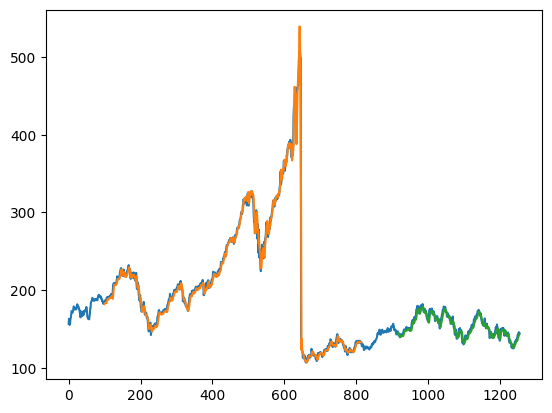

In [31]:
## plotting
# shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [32]:
len(test_data)

440

In [33]:
x_input = test_data[340:].reshape(1,-1)

In [34]:
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [40]:
temp_input

[0.1192736380713838,
 0.12656230432060112,
 0.14174076393237317,
 0.1177207263619286,
 0.12140262993112083,
 0.11403882279273636,
 0.10985597996242946,
 0.11932373199749524,
 0.1253850970569818,
 0.1174201628052598,
 0.11496556042579836,
 0.10917971195992482,
 0.11003130870381966,
 0.11251095804633682,
 0.10770194113963677,
 0.08926737633061982,
 0.07854727614276763,
 0.08919223544145266,
 0.09833437695679392,
 0.09908578584846583,
 0.09665623043206006,
 0.08328115216030052,
 0.08410770194113959,
 0.08050093926111451,
 0.07889793362554787,
 0.09054477144646211,
 0.07899812147777074,
 0.08909204758922978,
 0.0924483406386975,
 0.09272385723231058,
 0.09154664996869122,
 0.1012648716343143,
 0.10672510958046327,
 0.11396368190356915,
 0.10647463994990602,
 0.09507827175954914,
 0.1224796493425172,
 0.11646837820914213,
 0.10973074514715087,
 0.0956543519098309,
 0.08025046963055726,
 0.07899812147777074,
 0.08035065748278014,
 0.08180338134001247,
 0.07020663744520972,
 0.100262993112085

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.09040223]
101
1 day input [0.1265623  0.14174076 0.11772073 0.12140263 0.11403882 0.10985598
 0.11932373 0.1253851  0.11742016 0.11496556 0.10917971 0.11003131
 0.11251096 0.10770194 0.08926738 0.07854728 0.08919224 0.09833438
 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094 0.07889793
 0.09054477 0.07899812 0.08909205 0.09244834 0.09272386 0.09154665
 0.10126487 0.10672511 0.11396368 0.10647464 0.09507827 0.12247965
 0.11646838 0.10973075 0.09565435 0.08025047 0.07899812 0.08035066
 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461 0.10820288
 0.10507201 0.10990607 0.11133375 0.10311835 0.10855354 0.11078272
 0.10336882 0.09362555 0.08598622 0.10316844 0.10386976 0.10261741
 0.09966187 0.0903444  0.08541014 0.08969317 0.08846587 0.09430182
 0.09675642 0.0910958  0.07428929 0.06930495 0.0639449  0.06376957
 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017 0.05703193
 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698 0.05838447
 0.05983719 0.06675016 0.06654978

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt
len(df1)

1256

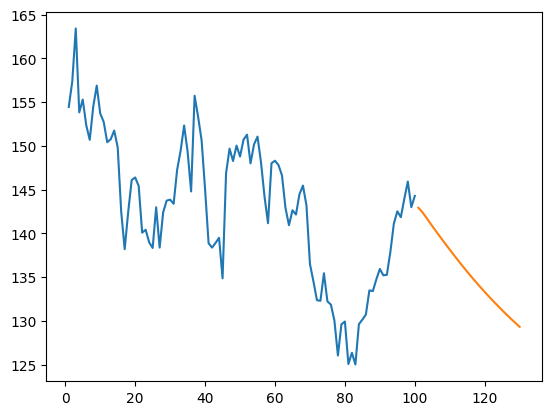

In [44]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

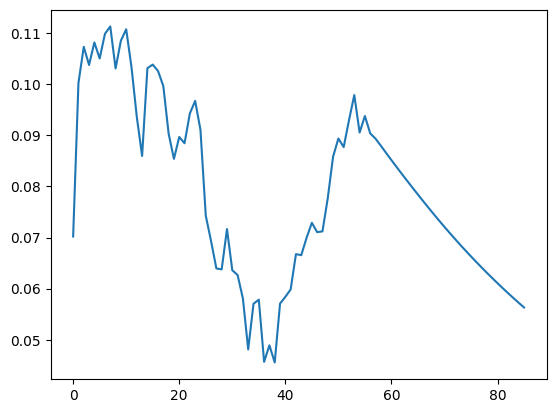

In [45]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [46]:
df3=scaler.inverse_transform(df3).tolist()

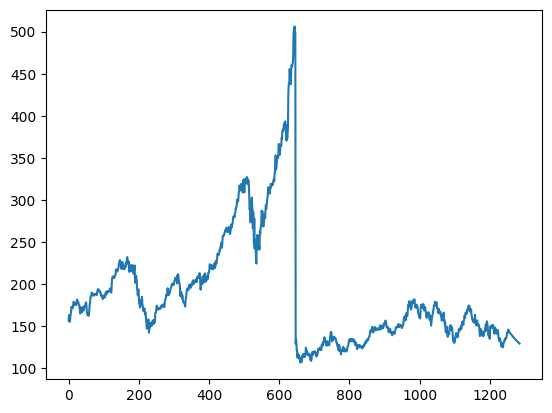

In [47]:
plt.plot(df3)